In [9]:
from drivecycle import drivecycle, trajectory, utils, plots

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

In [10]:
with open('edges', 'rb') as handle:
    edges = pickle.load(handle)
    
with open('stops', 'rb') as handle:
    stops = pickle.load(handle)

In [11]:
edges

[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.698,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 204,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.007,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 7.607,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 131,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False}]},
  'length': 0.067,
  'names': ['48 Avenue NW'],
  'speed': 35,
  'way_id': 463682703},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 23.67,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 177,
     'to_edge_name_consistency': False,
     'from_edge_name_consistency': False},
    {'road_class': 'residential',
     'begin_heading': 0,
     'to_edge_name_consistency': False,
     'f

In [3]:
data_ = []
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [4]:
len(data_)

347

In [5]:
a = utils.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()


In [6]:
stop={"bus_stop":30,"tertiary":10}
dc = drivecycle.sequential(a.get_edges(),stops=stop, stop_at_node=True, step=1)

INFO:root:Could not complete segment: vi: 14.66 , vf: 0.00, v_target:13.89, length: 20.90


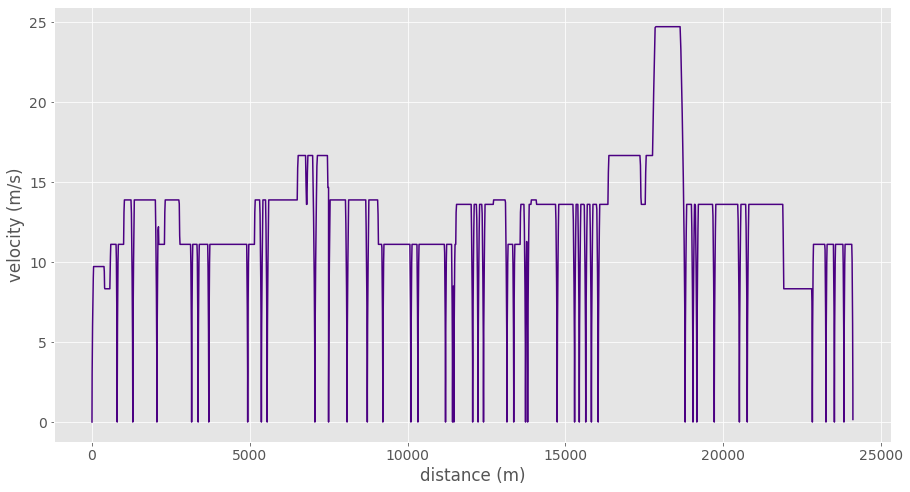

In [7]:
plots.plot_vd(dc,"route_drivecycle.png")

In [8]:
len(a.get_edges())

120